**Mount drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: ignored

**Split folders with train and validation ratio**

In [ ]:
"""!pip install split_folders
import splitfolders
DIRECTORY= r"/content/drive/MyDrive/Thesis Data set/Dhan-Shomadhan/Field Background"
output="/content/drive/MyDrive/Thesis Data set/prodata"
splitfolders.ratio(DIRECTORY,output,seed=42, ratio=(.8,.2))"""

**Import libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
import time
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix

**Print list them**

**`Read the data,resize the image, store the label and images to a list `**

In [ ]:
SIZE=128
train_images=[]
train_labels=[]
train_label=[]
for directory_path in glob.glob("/content/drive/MyDrive/Rice_newmerge/train/*"): # used to return all file paths that match a specific pattern
  #print(directory_path)
  label=directory_path.split('/') # seperate the file names neglecting '/'
  label=label[-1] # take the last column name as label
  train_label.append(label)
  print(label)

  for img_path in glob.glob(os.path.join(directory_path,"*")): # join the files with the images
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)  # read each image 
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(SIZE,SIZE)) # resize each image
    train_images.append(img)  #append each image to a list
    train_labels.append(label) # append each label name to a list

 #train_images=np.array(train_images)
 #train_labels=np.array(train_labels)
    


Brownspot
Bacterialblight
Tungro
Blast


**convert to numpy**

In [ ]:



train_images=np.array(train_images)
train_label=np.array(train_labels)
train_images.shape
print(train_images.shape)
#train_labels=['Brown Spot','Leaf Scaled','Rice Blast','Rice Tungro','Shath Blight']

#print(train_labels[0])

(4745, 128, 128)


**Read the data,resize the image, store the label and images to a list**

In [ ]:
SIZE=128
test_images=[]
test_labels=[]
test_label=[]
for directory_path in glob.glob("/content/drive/MyDrive/Rice_newmerge/val/*"):
  label=directory_path.split("/")[-1]
  test_label.append(label)
  #print(label)
  for img_path in glob.glob(os.path.join(directory_path,"*")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(SIZE,SIZE))
    test_images.append(img)
    test_labels.append(label)


**convert them to numpy**

In [ ]:
test_images=np.array(test_images)
test_labels=np.array(test_labels)
print(test_images.shape)

print(test_labels.shape)




(1187, 128, 128)
(1187,)


**Plot the orignal and resized image**

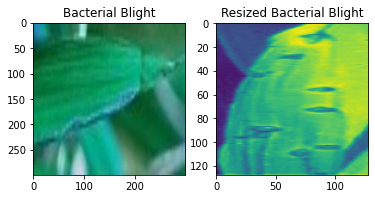

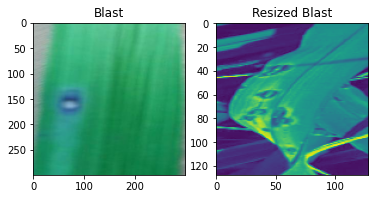

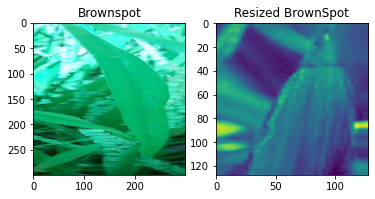

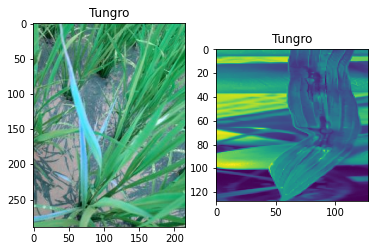

In [ ]:
img1=cv2.imread("/content/drive/MyDrive/Rice_newmerge/train/Bacterialblight/BACTERAILBLIGHT3_001.jpg",cv2.IMREAD_COLOR)
img2=cv2.imread("/content/drive/MyDrive/Rice_newmerge/train/Blast/BLAST1_001.jpg",cv2.IMREAD_COLOR)
img3=cv2.imread("/content/drive/MyDrive/Rice_newmerge/train/Brownspot/BROWNSPOT1_001.jpg",cv2.IMREAD_COLOR)
img4=cv2.imread("/content/drive/MyDrive/Rice_newmerge/train/Tungro/TUNGRO1_008.jpg",cv2.IMREAD_COLOR)
#img5=cv2.imread("/content/drive/MyDrive/Rice_newmerge/train/Tungro/TUNGRO1_001.jpg",cv2.IMREAD_COLOR)

#plt.imshow(img1)
#plt.subplot()
#plt.imshow(train_images[0])

# subplot is used to plot two images side by side

fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure()

ax1 = fig1.add_subplot(1,2,1)
ax1.imshow(img1)
ax2 = fig1.add_subplot(1,2,2)
ax2.imshow(train_images[2])

ax1.title.set_text('Bacterial Blight')
ax2.title.set_text('Resized Bacterial Blight')

#fig.set_figheight(7)
#fig.set_figwidth(7)

ax3 = fig2.add_subplot(1,2,1)
ax3.imshow(img2)
ax4 = fig2.add_subplot(1,2,2)
ax4.imshow(train_images[1268])

ax3.title.set_text('Blast')
ax4.title.set_text('Resized Blast')

ax5 = fig3.add_subplot(1,2,1)
ax5.imshow(img3)
ax6 = fig3.add_subplot(1,2,2)
ax6.imshow(train_images[2420])

ax5.title.set_text('Brownspot')
ax6.title.set_text('Resized BrownSpot')

ax7 = fig4.add_subplot(1,2,1)
ax7.imshow(img4)
ax8 = fig4.add_subplot(1,2,2)
ax8.imshow(train_images[3676])

ax7.title.set_text('Tungro')
ax8.title.set_text('Tungro')

#ax9 = fig4.add_subplot(1,2,1)
#ax9.imshow(img5)


**For plotting purpose seperate each class and label of data in different class**

In [ ]:
train_images1=[]
train_labels1=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Rice_newmerge/train/Bacterialblight","*")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    train_images1.append(img)
    train_labels1.append(label)





train_images2=[]
train_labels2=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Rice_newmerge/train/Blast","*")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    train_images2.append(img)
    train_labels2.append(label)



train_images3=[]
train_labels3=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Rice_newmerge/train/Brownspot","*")):
 #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    train_images3.append(img)
    train_labels3.append(label)



train_images4=[]
train_labels4=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Rice_newmerge/train/Tungro","*")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    train_images4.append(img)
    train_labels4.append(label)






**Plot a bar chart for no of data and labels**

1267
1152
1280
1046


<BarContainer object of 4 artists>

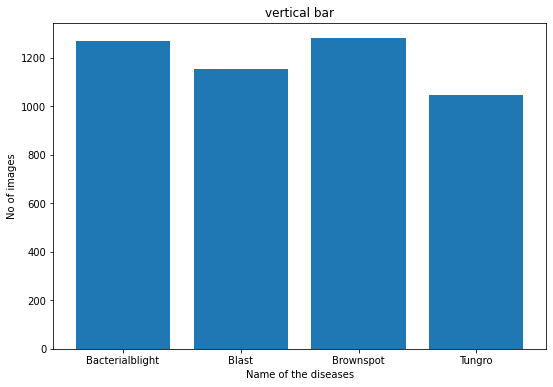

In [ ]:
print(len(train_images1))
print(len(train_images2))
print(len(train_images3))
print(len(train_images4))
#print(len(train_images5))
#print(train_labels)

yAxis=[]
yAxis.append(len(train_images1))
yAxis.append(len(train_images2))
yAxis.append(len(train_images3))
yAxis.append(len(train_images4))



#Initialize the plot and sublots
# Initialize the plot
fig = plt.figure(figsize=(30,6))
ax1 = fig.add_subplot(131)
ax1.set(title='vertical bar', xlabel='Name of the diseases', ylabel='No of images')
#ax1.bar(train_labels, yAxis)

train_label=['Bacterialblight','Blast','Brownspot','Tungro']
ax1.bar(train_label, yAxis)

#print(yAxis)
#print(train_labels)


In [ ]:
test_images1=[]
test_labels1=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Rice_newmerge/val/Bacterialblight","*")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    test_images1.append(img)
    test_labels1.append(label)





test_images2=[]
test_labels2=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Rice_newmerge/val/Blast","*")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    test_images2.append(img)
    test_labels2.append(label)



test_images3=[]
test_labels3=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Rice_newmerge/val/Brownspot","*")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    test_images3.append(img)
    test_labels3.append(label)



test_images4=[]
test_labels4=[]
#for directory_path in glob.glob("/content/drive/MyDrive/Thesis Data set/prodata/train/Browon Spot/*"):
  #label=directory_path.split("\\")[-1]
  #print(label)
for img_path in glob.glob(os.path.join("/content/drive/MyDrive/Rice_newmerge/val/Tungro","*")):
    #print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(SIZE,SIZE))
    test_images4.append(img)
    test_labels4.append(label)






317
288
320
262


<BarContainer object of 4 artists>

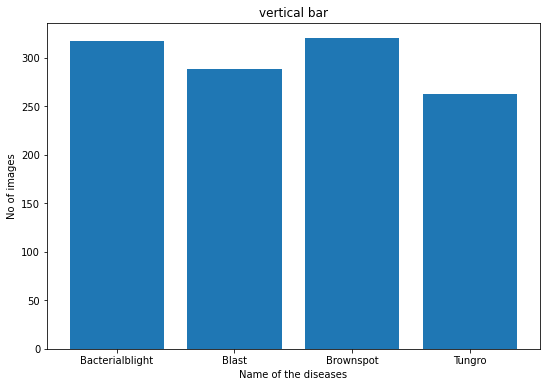

In [ ]:
print(len(test_images1))
print(len(test_images2))
print(len(test_images3))
print(len(test_images4))




yAxis=[]
yAxis.append(len(test_images1))
yAxis.append(len(test_images2))
yAxis.append(len(test_images3))
yAxis.append(len(test_images4))



#Initialize the plot and sublots
# Initialize the plot
fig = plt.figure(figsize=(30,6))
ax1 = fig.add_subplot(131)
ax1.set(title='vertical bar', xlabel='Name of the diseases', ylabel='No of images')
#ax1.bar(train_labels, yAxis)

test_label=['Bacterialblight','Blast','Brownspot','Tungro']
ax1.bar(test_label, yAxis)

#print(yAxis)
#print(train_labels)



**Normalize the data**

In [ ]:
#X_train=train_images/255.0
#X_test =test_images/255.0

#np.random.shuffle(train_images)
X_train=train_images/255.0
X_test =test_images/255.0



TypeError: ignored

**Encode labels**

In [ ]:

le=preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded=le.transform(test_labels)
le.fit(train_label)
train_labels_encoded=le.transform(train_label)






**Gabor Filter**

In [ ]:
def feature_extractor(dataset):
  x_train=dataset
  image_dataset=pd.DataFrame();
  for image in range(x_train.shape[0]):
      df=pd.DataFrame()
      input_img=x_train[image,:,:]
      img=input_img
      pixel_values=img.reshape(-1)
      df['Pixel_Value']=pixel_values

      num=1
      kernels=[]
      for theta in range(2):
        

        theta=theta/4. * np.pi
        for sigma in (1,3):
          lamda=np.pi/4
          gamma=0.5
          gabor_label='Gabor' + str(num)
          ksize=9
          
          kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F) 
          kernels.append(kernel)
                #Now filter the image and add values to a new column 
          fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
          filtered_img = fimg.reshape(-1)
          cv2.imwrite('/content/drive/MyDrive/gaborfeature/'+gabor_label+'.jpg', filtered_img.reshape(img.shape))
          df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
          print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
          num += 1  #I
      edge_sobel = sobel(img)
      edge_sobel1 = edge_sobel.reshape(-1)
      cv2.imwrite('/content/drive/MyDrive/gaborfeature/'+edge_sobel1+'.jpg', filtered_img.reshape(img.shape))
      df['Sobel'] = edge_sobel1
       
      image_dataset = image_dataset.append(df)

  return image_dataset        


In [ ]:
#Extract features from training images
image_features = feature_extractor(X_train)

#image_features= image_features.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
#print(image_features.describe)

Streaming output truncated to the last 5000 lines.
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma=

In [ ]:
feature_extractor(X_train)

Streaming output truncated to the last 5000 lines.
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma=

,Pixel_Value,Gabor1,Gabor2,Gabor3,Gabor4,Sobel
0,0.858824,2,3,7,7,0.024744
1,0.803922,2,3,7,7,0.040494
2,0.792157,2,3,7,7,0.034032
3,0.815686,2,3,7,7,0.026543
4,0.827451,2,3,7,7,0.017455
...,...,...,...,...,...,...
16379,0.329412,1,1,3,3,0.052440
16380,0.333333,1,2,3,3,0.038920
16381,0.356863,1,1,3,2,0.017122
16382,0.396078,1,1,3,2,0.053707


In [ ]:
#image_features = image_features.fillna(image_features.mean())
print(image_features.)

<bound method NDFrame.describe of        Pixel_Value  Gabor1  Gabor2  Gabor3  Gabor4     Sobel
0         0.858824       2       3       7       7  0.024744
1         0.803922       2       3       7       7  0.040494
2         0.792157       2       3       7       7  0.034032
3         0.815686       2       3       7       7  0.026543
4         0.827451       2       3       7       7  0.017455
...            ...     ...     ...     ...     ...       ...
16379     0.329412       1       1       3       3  0.052440
16380     0.333333       1       2       3       3  0.038920
16381     0.356863       1       1       3       2  0.017122
16382     0.396078       1       1       3       2  0.053707
16383     0.407843       1       1       3       2  0.065532

[56344576 rows x 6 columns]>


In [ ]:
#image_features= image_features.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)

X_for_RF = np.reshape(image_features, (X_train.shape[0], -1)) 

#print(X_for_RF)


In [ ]:
image_features.shape

(1, 56344576, 6)

In [ ]:
#Define the classifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
RF_model =OneVsRestClassifier( RandomForestClassifier(n_estimators = 50, random_state = 42))
SVM_model = OneVsRestClassifier(svm.SVC(decision_function_shape='ovo'))
dt=OneVsRestClassifier(DecisionTreeClassifier())
knn=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
abc = OneVsRestClassifier(AdaBoostClassifier(n_estimators=50))

#Can also use SVM but RF is faster and may be more accurate.
#from sklearn import svm
#SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification
#SVM_model.fit(X_for_RF, train_labels_encoded)

X_for_RF.shape
# Fit the model on training data
RF_model.fit(X_for_RF, train_labels_encoded) #For sklearn no one hot encoding
SVM_model.fit(X_for_RF, train_labels_encoded)
dt.fit(X_for_RF, train_labels_encoded)
knn.fit(X_for_RF, train_labels_encoded)
abc.fit(X_for_RF, train_labels_encoded)


OneVsRestClassifier(estimator=AdaBoostClassifier())

In [ ]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(X_test)
#test_features = test_features.fillna(image_features.mean())

test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (X_test.shape[0], -1))

print(test_for_RF)

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853

In [ ]:
test_predictionRF = RF_model.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_predictionRF = le.inverse_transform(test_predictionRF)

test_predictionsvm = SVM_model.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_predictionsvm = le.inverse_transform(test_predictionsvm)

test_predictionsknn = knn.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_predictionknn = le.inverse_transform(test_predictionsknn)

test_predictiondt = dt.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_predictiondt = le.inverse_transform(test_predictiondt)

test_predictionada = abc.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_predictionada = le.inverse_transform(test_predictionada)



#Print overall accuracy
from sklearn import metrics
print ("Accuracy for Random Forest = ", metrics.accuracy_score(test_labels, test_predictionRF))
print ("Accuracy for SVM = ", metrics.accuracy_score(test_labels, test_predictionsvm))
print ("Accuracy for decisionTree = ", metrics.accuracy_score(test_labels, test_predictiondt))
print ("Accuracy for Knn = ", metrics.accuracy_score(test_labels, test_predictionknn))
print ("Accuracy for Adaboost = ", metrics.accuracy_score(test_labels, test_predictionada))




Accuracy for Random Forest =  0.966183574879227
Accuracy for SVM =  0.8079710144927537
Accuracy for decisionTree =  0.8852657004830918
Accuracy for Knn =  0.7548309178743962
Accuracy for Adaboost =  0.9021739130434783


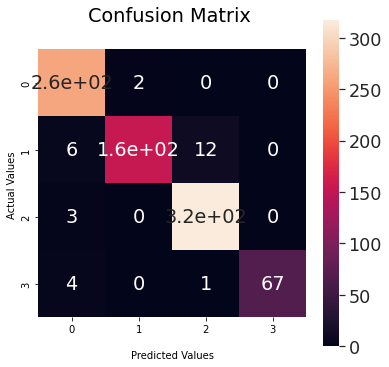

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_predictionRF)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

ax.set_title('Confusion Matrix \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

#Check results on a few random images
import random
n=random.randint(0, X_test.shape[0]-1) #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)

In [ ]:
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = RF_model.predict(input_img_for_RF)
img_i=RF_model.predict_proba(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor2 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor3 : theta= 0.7853981633974483 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor4 : theta= 0.7853981633974483 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
The prediction for this image is:  ['Bacterialblight']
The actual label for this image is:  Bacterialblight


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(test_labels.shape)
print(test_images.shape)
print(img_prediction[:])

(828,)
(828, 128, 128)
['Bacterialblight']


In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['Bacterialblight','Blast','Brownspot','Tungro'], 
                     columns = ['Bacterialblight','Blast','Brownspot','Tungro'])



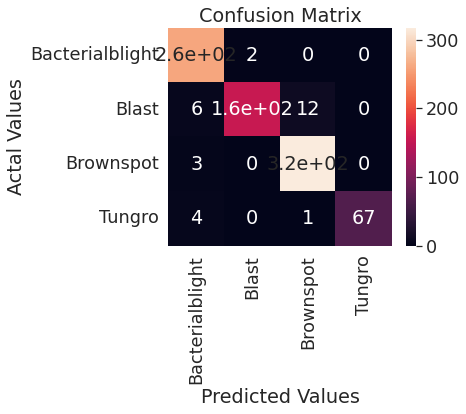

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
print(X_test.shape)
print(test_labels.shape)

(828, 128, 128)
(828,)


In [ ]:
s,nx,ny=X_test.shape
x_test=X_test.reshape((s,nx*ny))
x_test.shape
classes=le.classes_

from sklearn.metrics import roc_curve,auc

In [ ]:
#from sklearn.multiclass import OneVsRestClassifier
#RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
#RF.fit(X_for_RF,train_label)
y_pred =RF_model.predict(test_for_RF)
pred_prob = RF_model.predict_proba(test_for_RF)

**ROC of Random Forest**


[0.09859155]


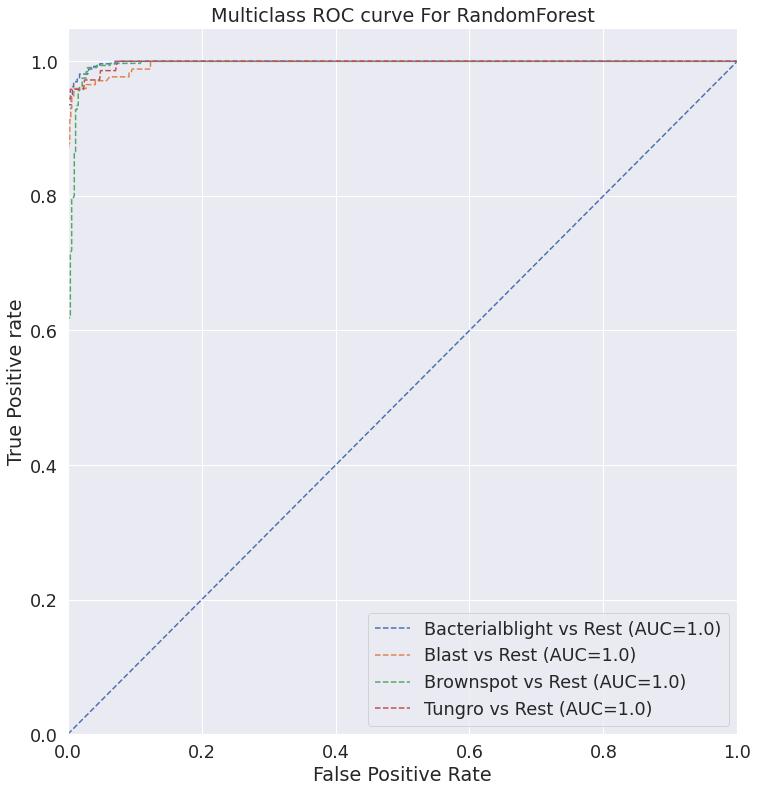

In [ ]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(test_labels_encoded,classes=np.unique(test_labels_encoded))
print(img_i[:,1])
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]


for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.01f)'%(classes[i],roc_auc[i]))

plt.rcParams['figure.figsize']=(12,13)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve For RandomForest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
#plt.figure(figsize=(10,5))
plt.show()


**ROC for KNN**

In [ ]:
#y_pred1 =SVM_model.predict(test_for_RF)
pred_prob1 = knn.predict_proba(test_for_RF)

[0.09859155]


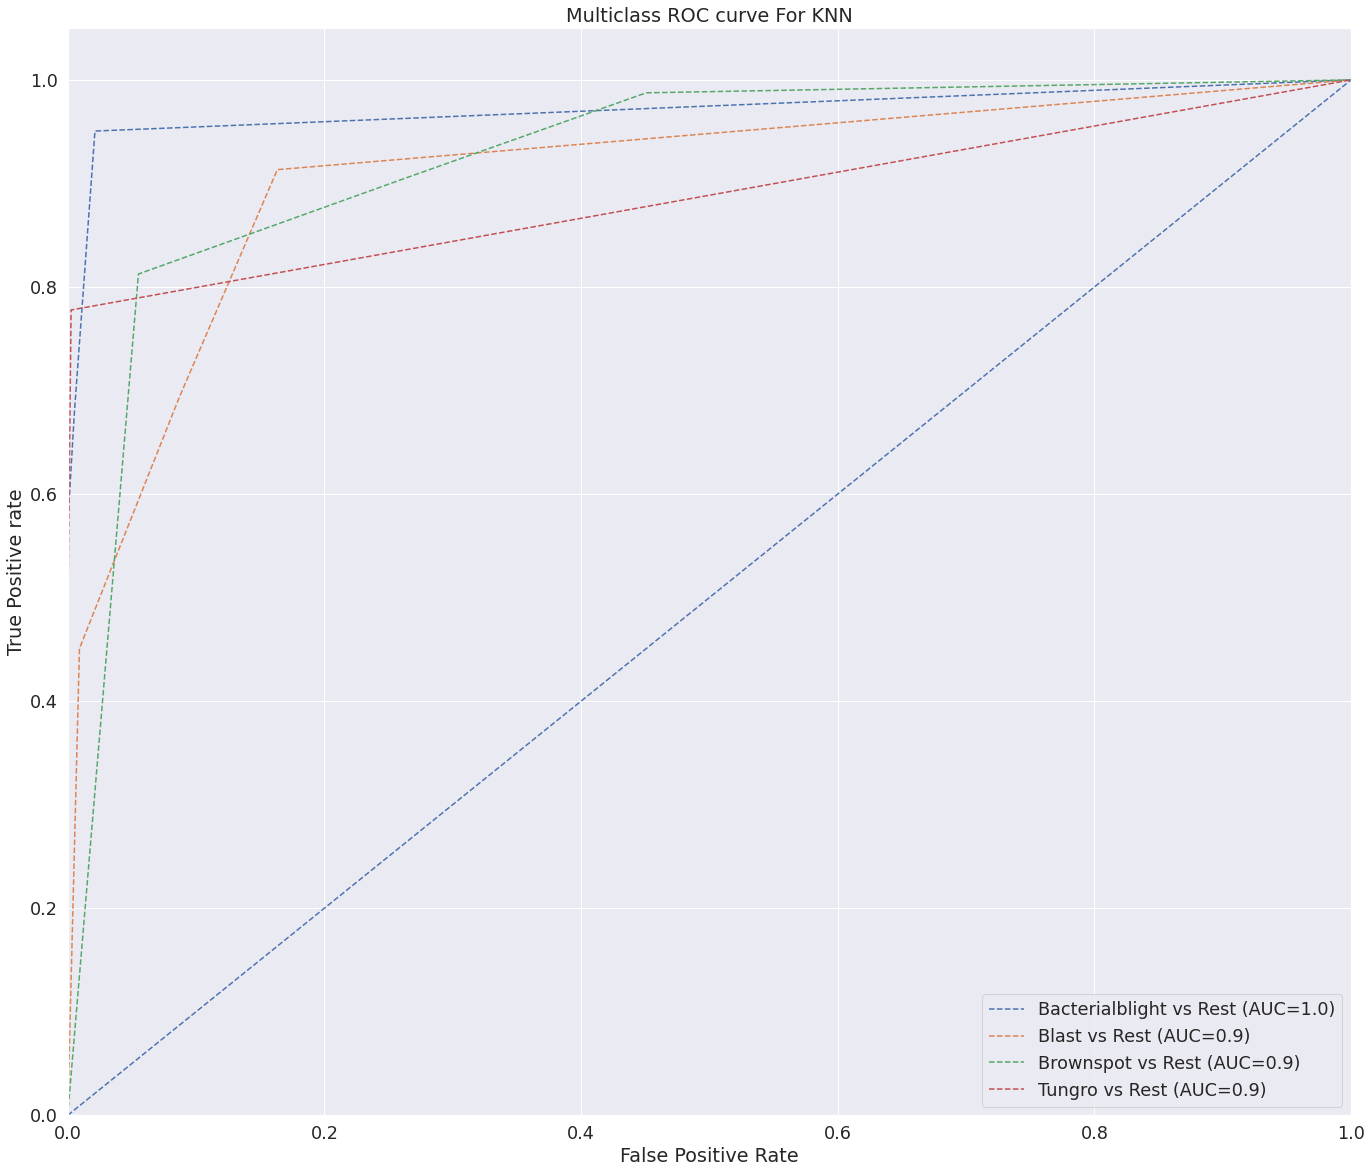

In [ ]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(test_labels_encoded,classes=np.unique(test_labels_encoded))
print(img_i[:,1])
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]


for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob1[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.01f)'%(classes[i],roc_auc[i]))

plt.rcParams['figure.figsize']=(12,13)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve For KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
#plt.figure(figsize=(10,5))
plt.show()


**ROC for adaboost**

[0.09859155]


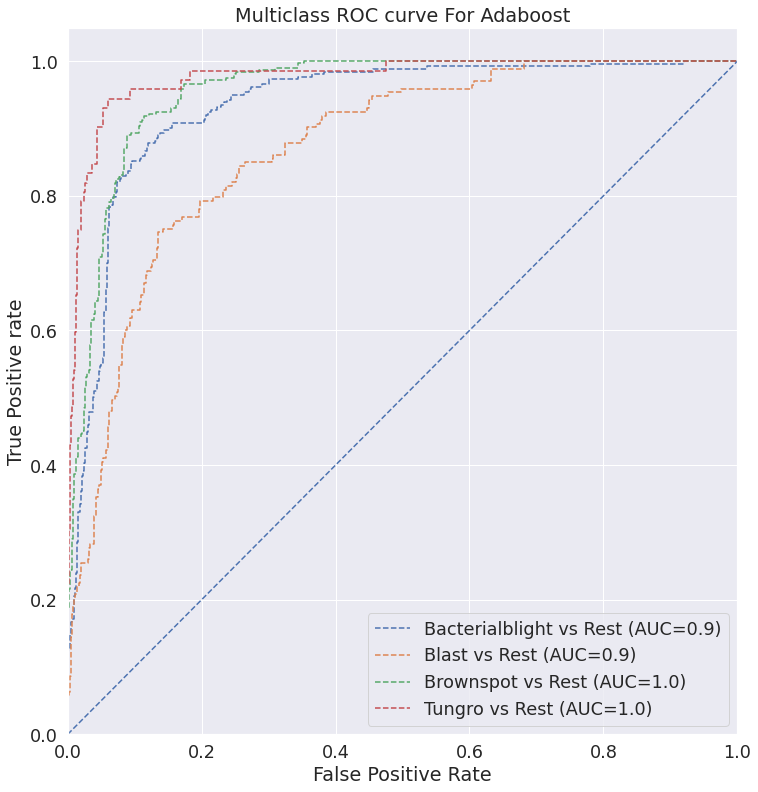

In [ ]:
pred_prob2 = abc.predict_proba(test_for_RF)

from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(test_labels_encoded,classes=np.unique(test_labels_encoded))
print(img_i[:,1])
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]


for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob2[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.01f)'%(classes[i],roc_auc[i]))

plt.rcParams['figure.figsize']=(12,13)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve For Adaboost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
#plt.figure(figsize=(10,5))
plt.show()

**ROC**

In [ ]:
pred_prob3 = dt.predict_proba(test_for_RF)

from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(test_labels_encoded,classes=np.unique(test_labels_encoded))
print(img_i[:,1])
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]


for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob3[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.01f)'%(classes[i],roc_auc[i]))

plt.rcParams['figure.figsize']=(12,13)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve For Adaboost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
#plt.figure(figsize=(10,5))
plt.show()

[0.10909091]


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:502: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


ValueError: ignored

**Confusion matrix**

In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_labels, test_predictionRF))

                 precision    recall  f1-score   support

Bacterialblight       0.95      0.99      0.97       263
          Blast       0.99      0.90      0.94       173
      Brownspot       0.96      0.99      0.98       320
         Tungro       1.00      0.93      0.96        72

       accuracy                           0.97       828
      macro avg       0.98      0.95      0.96       828
   weighted avg       0.97      0.97      0.97       828



In [ ]:

from sklearn import metrics
print(metrics.classification_report(test_labels, test_predictionsvm))


                 precision    recall  f1-score   support

Bacterialblight       0.81      0.94      0.87       263
          Blast       0.90      0.47      0.62       173
      Brownspot       0.78      0.93      0.85       320
         Tungro       0.89      0.58      0.71        72

       accuracy                           0.81       828
      macro avg       0.84      0.73      0.76       828
   weighted avg       0.82      0.81      0.79       828



In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_labels, test_predictiondt))

                 precision    recall  f1-score   support

Bacterialblight       0.97      0.89      0.93       263
          Blast       0.91      0.80      0.85       173
      Brownspot       0.94      0.93      0.94       320
         Tungro       0.53      0.89      0.66        72

       accuracy                           0.89       828
      macro avg       0.84      0.88      0.84       828
   weighted avg       0.91      0.89      0.89       828



In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_labels, test_predictionknn))

                 precision    recall  f1-score   support

Bacterialblight       0.98      0.68      0.80       263
          Blast       0.68      0.69      0.69       173
      Brownspot       0.67      0.91      0.77       320
         Tungro       0.95      0.50      0.65        72

       accuracy                           0.75       828
      macro avg       0.82      0.70      0.73       828
   weighted avg       0.80      0.75      0.75       828



In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_labels, test_predictionada))

                 precision    recall  f1-score   support

Bacterialblight       0.86      0.94      0.90       263
          Blast       0.91      0.80      0.85       173
      Brownspot       0.92      0.94      0.93       320
         Tungro       0.95      0.86      0.91        72

       accuracy                           0.90       828
      macro avg       0.91      0.88      0.90       828
   weighted avg       0.90      0.90      0.90       828



In [ ]:


import numpy as np
import cv2
import pandas as pd
 
#img = cv2.imread('BSE_Image.jpg')
img = cv2.imread('/content/drive/MyDrive/Rice_newmerge/train/Bacterialblight/BACTERAILBLIGHT3_001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
#Here, if you have multichannel image then extract the right channel instead of converting the image to grey. 
#For example, if DAPI contains nuclei information, extract the DAPI channel image first. 

#Multiple images can be used for training. For that, you need to concatenate the data

#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop
for theta in range(8):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3, 5, 7):  #Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                           
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=5  #Try 15 for hidden image. Or 9 for others
                phi = 0  #0.8 for hidden image. Otherwise leave it to 0
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)                
                filtered_img = fimg.reshape(-1)
                
                cv2.imwrite('/content/drive/MyDrive/gaborfeature/'+gabor_label+'.jpg', filtered_img.reshape(img.shape))

                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                
                num += 1  #Increment for gabor column label
                
print(df.head())

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

<ipython-input-2-dec0c64ecf63>:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.


Gabor103 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor104 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor105 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor106 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor107 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor108 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor109 : theta= 2.356194490192345 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor110 : theta= 2.356194490192345 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor111 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor112 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor113 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor114 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Ga